In [1]:
from pyprojroot import here
import sys
import os
# spyder up to find the root
root = here(project_files=[".here"])
# append to path
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/Downloads/ML4CC General-bb3a2964c9d4.json"
sys.path.append(str(here()))

In [2]:
import geopandas as gpd
from src.data.copernicusEMS import activations

In [3]:
table_activations_ems = activations.table_floods_ems(event_start_date="2017-01-01")
table_activations_ems = table_activations_ems.set_index("Code")
table_activations_ems

,Title,CodeDate,Type,Country
Code,,,,
EMSR502,Flood in Southern Ireland,2021-02-23,Flood,Ireland
EMSR501,Flood in Albania,2021-01-06,Flood,Albania
EMSR498,"Flood in Corrèze department, France",2021-02-02,Flood,France
EMSR497,Flood in Germany,2021-02-01,Flood,Germany
EMSR496,"Flood in Lazio Region, Italy",2021-01-26,Flood,Italy
...,...,...,...,...
EMSR223,Windfall damage in Poland,2017-08-12,Storm,Poland
EMSR215,Flood in Braunschweig,2017-07-27,Flood,Germany
EMSR205,"Floods in Sabaragamuwa/West, Sri Lanka",2017-05-24,Flood,Sri Lanka


In [4]:
activation = "EMSR486"
# activation = "EMSR271"

zip_files_activation = activations.fetch_zip_files(activation)
zip_files_activation

['https://emergency.copernicus.eu/mapping/download/183885/EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/183886/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/183878/EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/183879/EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector.zip']

In [5]:
from tqdm import tqdm

unzip_files_activation = []
for zip_file in tqdm(zip_files_activation):
    local_zip_file = activations.download_vector_cems(zip_file)
    unzipped_file = activations.unzip_copernicus_ems(local_zip_file,
                                                     folder_out=f"Copernicus_EMS_raw/{activation}")
    unzip_files_activation.append(unzipped_file)

unzip_files_activation

100%|██████████| 4/4 [00:00<00:00, 1025.82it/s]

	File https://emergency.copernicus.eu/mapping/download/183885/EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector.zip exists will not be download
	File https://emergency.copernicus.eu/mapping/download/183886/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector.zip exists will not be download
	File https://emergency.copernicus.eu/mapping/download/183878/EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector.zip exists will not be download
	File https://emergency.copernicus.eu/mapping/download/183879/EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector.zip exists will not be download


['Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector',
 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector',
 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector',
 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector']

In [6]:
code_date = table_activations_ems.loc[activation]["CodeDate"]

registers = []
for unzip_folder in unzip_files_activation:
    register = activations.filter_register_copernicusems(unzip_folder, code_date)
    registers.append(register)
    print(register["name"])


EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector
EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector
EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector
EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector


In [7]:
register = registers[1]
register

{'name': 'EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector',
 'ems_code': 'EMSR486',
 'timestamp': Timestamp('2020-12-03 09:32:00+0000', tz='UTC'),
 'satellite': 'SPOT-6-7',
 'area_of_interest': <shapely.geometry.polygon.Polygon at 0x7fd8c875f0a0>,
 'timestamp_ems_code': datetime.datetime(2020, 11, 28, 0, 0, tzinfo=datetime.timezone.utc),
 'observed_event_file': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR486_AOI02_DEL_PRODUCT_observedEventA_r1_v1.shp',
 'area_of_interest_file': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR486_AOI02_DEL_PRODUCT_areaOfInterestA_r1_v1.shp',
 'satellite_pre_event': 'SPOT-6-7',
 'timestamp_pre_event': Timestamp('2020-08-23 10:07:00+0000', tz='UTC'),
 'hydrology_file': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR486_AOI02_DEL_PRODUCT_hydrographyA_r1_v1.shp',
 'hydrology_file_l': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR

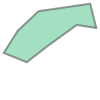

In [8]:
register["area_of_interest"]

In [9]:
# from imp import reload
# reload(activations)
floodmap = activations.generate_floodmap(register, None)
floodmap

,geometry,w_class,source
0,"POLYGON ((9.73630 40.65413, 9.73640 40.65384, ...",Flooded area,flood
1,"POLYGON ((9.43073 40.48629, 9.43105 40.48624, ...",Flooded area,flood
2,"POLYGON ((9.73300 40.64552, 9.73289 40.64541, ...",Flooded area,flood
3,"POLYGON ((9.73272 40.64477, 9.73259 40.64475, ...",Flooded area,flood
4,"POLYGON ((9.73443 40.64483, 9.73446 40.64479, ...",Flooded area,flood
...,...,...,...
182,"POLYGON ((9.70701 40.67113, 9.70655 40.67087, ...",BH130-Reservoir,hydro
183,"MULTIPOLYGON (((9.52815 40.63265, 9.52861 40.6...",BH140-River,hydro
184,"POLYGON ((9.64134 40.62771, 9.64126 40.62756, ...",BH080-Lake,hydro
185,"POLYGON ((9.63985 40.62859, 9.63976 40.62841, ...",BH080-Lake,hydro


In [10]:
def generate_polygon(bbox):
    """
    Generates a list of coordinates: [[x1,y1],[x2,y2],[x3,y3],[x4,y4],[x1,y1]]
    """
    return [[bbox[0],bbox[1]],
             [bbox[2],bbox[1]],
             [bbox[2],bbox[3]],
             [bbox[0],bbox[3]],
             [bbox[0],bbox[1]]]

In [11]:
from datetime import timedelta
from datetime import datetime

import ee
from src.data import ee_download
import geemap.eefolium as geemap

from imp import reload
reload(ee_download)

ee.Initialize()

bounds_pol = generate_polygon(register["area_of_interest"].bounds)
pol_2_clip = ee.Geometry.Polygon(bounds_pol)

# pol with the real area of interest
x, y = register["area_of_interest"].exterior.coords.xy
pol_list = list(zip(x,y))
pol = ee.Geometry.Polygon(pol_list)

date_event = datetime.utcfromtimestamp(register["timestamp"].timestamp())

date_end_search = date_event + timedelta(days=20)

img_col = ee_download.get_s2_collection(date_event, date_end_search, pol)

n_images_col = img_col.size().getInfo()
print(f"Found {n_images_col} images")
Map = geemap.Map()

imgs_list = img_col.toList(n_images_col, 0)
for i in range(n_images_col):
    img_show = ee.Image(imgs_list.get(i))
    # print(img_show.bandNames().getInfo())
    Map.addLayer(img_show.clip(pol_2_clip), 
                 {"min":0, "max":3000, "bands":["B4","B3","B2"]},f"S2 {i}", True)

geojson_file = "geojson_show.geojson"
floodmap.to_file(geojson_file, driver="GeoJSON")
Map.add_geojson(geojson_file,name="FloodMap")

Map.centerObject(pol)
Map.addLayerControl()
Map

Found 3 images


In [16]:
BANDS_EXPORT = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA60', 'probability']

img_export = ee.Image(imgs_list.get(1))

img_export = img_export.select(BANDS_EXPORT).toFloat().clip(pol_2_clip) # .reproject(crs,scale=10).resample('bicubic') resample cannot be used on composites

bucket_name= "ml4floods"

export_task_fun_img = ee_download.export_task_image(bucket=bucket_name)

filename = os.path.join("preingest", "S2", "sardinia")
desc = os.path.basename(filename) + "S2"
task = ee_download.mayberun(filename, desc,
                            lambda : img_export,
                            export_task_fun_img,
                            overwrite=True, dry_run=False,
                            bucket_name=bucket_name, verbose=2)
task.status()

{'state': 'READY',
 'description': 'sardiniaS2',
 'creation_timestamp_ms': 1614207265742,
 'update_timestamp_ms': 1614207265742,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': 'YH7H6UBTUWOUCQLAIRHLLBBF',
 'name': 'projects/earthengine-legacy/operations/YH7H6UBTUWOUCQLAIRHLLBBF'}

In [26]:
task.status()

{'state': 'COMPLETED',
 'description': 'sardiniaS2',
 'creation_timestamp_ms': 1614207265742,
 'update_timestamp_ms': 1614207556066,
 'start_timestamp_ms': 1614207272361,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://console.developers.google.com/storage/browser/ml4floods/preingest/S2/'],
 'attempt': 1,
 'id': 'YH7H6UBTUWOUCQLAIRHLLBBF',
 'name': 'projects/earthengine-legacy/operations/YH7H6UBTUWOUCQLAIRHLLBBF'}

In [29]:
from src.data import create_gt
import rasterio

image_name = f"gs://{bucket_name}/{filename}.tif"
with rasterio.open(image_name) as src:
    print(src.shape)
    image = src.read()
    transform = src.transform

image.shape

(15, 3475, 5490)

In [30]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

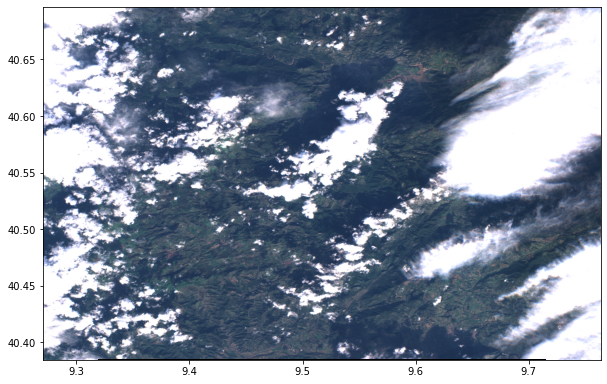

<AxesSubplot:>

In [31]:
from rasterio import plot as rasterioplt
import numpy as np

rgb = np.clip(image[(3,2,1),...]/3000.,0,1)
    
rasterioplt.show(rgb, transform=transform)

In [32]:
water_mask = create_gt.compute_water(image_name, floodmap)

In [33]:
water_mask.shape,np.unique(water_mask)

((3475, 5490), array([-1,  0,  1,  2], dtype=int16))

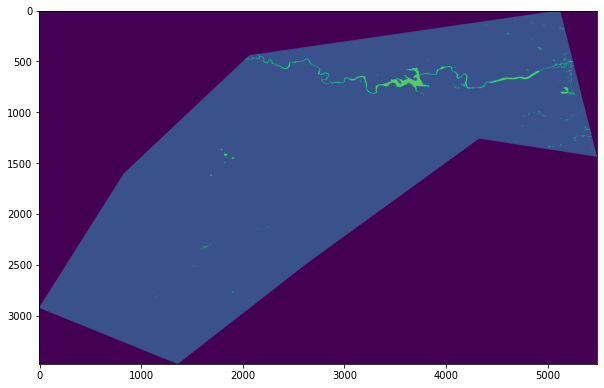

In [34]:
plt.imshow(water_mask,vmin=-1, vmax=3)